In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [19]:
df=pd.read_csv('Clustering.csv')
xx=df.replace(to_replace=['Male', 'Female'], value=[0, 1])

In [20]:
x=xx[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
xxx=xx[['Age']]
yyy=xx[['Annual Income (k$)']]
zzz=xx[['Spending Score (1-100)']]

In [21]:
clustering = DBSCAN(eps=10, min_samples=2).fit(x)
labels=clustering.labels_

NameError: name 'n_clusters_' is not defined

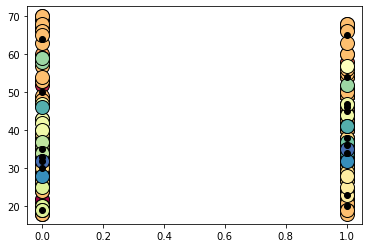

In [27]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()